### [ 남북한발전전력량 분석 및 시각화]
- 데이터셋 : 남북한발전전력량.xlsx
- 데이터구성
    * 1990년 ~ 2016년까지 수력, 화력, 원자력, 신재생 에너지 데이터
- 분석 주제 : 남한과 북한의 에너지 데이터 변화 분석


In [417]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [418]:
# [2] 데이터 준비
FILE_DATA=r'C:\Users\KDP-14\Desktop\EX_PANDAS6\data\남북한발전전력량.xlsx'

In [419]:
# [3] EXCEL => DataFrame 형태로 저장
dataDF=pd.read_excel(FILE_DATA)

In [420]:
# [4] 데이터 확인
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [421]:
# - 멀티인덱싱 : 컬럼 ==> 행인덱스 설정
# dataDF.set_index()
print(dataDF.head())


  전력량 (억㎾h) 발전 전력별  1990  1991  1992  1993  1994  1995  1996  1997  ...  2007  \
0        남한     합계  1077  1186  1310  1444  1650  1847  2055  2244  ...  4031   
1       NaN     수력    64    51    49    60    41    55    52    54  ...    50   
2       NaN     화력   484   573   696   803  1022  1122  1264  1420  ...  2551   
3       NaN    원자력   529   563   565   581   587   670   739   771  ...  1429   
4       NaN    신재생     -     -     -     -     -     -     -     -  ...     -   

   2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  4224  4336  4747  4969  5096  5171  5220  5281  5404  
1    56    56    65    78    77    84    78    58    66  
2  2658  2802  3196  3343  3430  3581  3427  3402  3523  
3  1510  1478  1486  1547  1503  1388  1564  1648  1620  
4     -     -     -     -    86   118   151   173   195  

[5 rows x 29 columns]


In [422]:
# [5] 데이터 전처리 및 가공
# 결측치 처리하기
# - (1) NaN 컬럼에 대한 처리
# - (2) 2개의 컬럼을 행인덱스로 설정

In [423]:
# - (1) NaN 컬럼에 대한 처리
dataDF.columns # 컬럼 확인

dataDF[dataDF.columns[0]] # dataDF['전력량 (억㎾h)'] => 하드코딩

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [424]:
# dataDF[dataDF.columns[0]].fillna(method='ffill') => 미래에 오류 생긴다고 뜸
dataDF[dataDF.columns[0]].ffill(inplace=True)
dataDF.head()

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [425]:
# - (2) 2개의 컬럼을 행인덱스로 설정
dataDF=dataDF.set_index([dataDF.columns[0],dataDF.columns[1]])
dataDF

1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        -     -     -     -     -     -     -     -     -     -   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        -     -     -     -     -     -     -     -     -     -   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     -     -     -     -     -    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     -     -     -     -     -     -     -     -     -   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        -  

[9 rows x 27 columns]

In [426]:
hy=dataDF.loc[('남한','신재생')]['1990']
dataDF[:].isin([hy]).sum()


1990    2
1991    2
1992    2
1993    2
1994    2
1995    2
1996    2
1997    2
1998    2
1999    2
2000    2
2001    2
2002    2
2003    2
2004    2
2005    2
2006    2
2007    2
2008    2
2009    2
2010    2
2011    2
2012    1
2013    1
2014    1
2015    1
2016    1
dtype: int64

In [427]:
dataDF=dataDF[:][:].replace(hy,0)
dataDF

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_14572\1239847793.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF=dataDF[:][:].replace(hy,0)


1990  1991  1992  1993  1994  1995  1996  1997  1998  1999  \
전력량 (억㎾h) 발전 전력별                                                               
남한        합계      1077  1186  1310  1444  1650  1847  2055  2244  2153  2393   
          수력        64    51    49    60    41    55    52    54    61    61   
          화력       484   573   696   803  1022  1122  1264  1420  1195  1302   
          원자력      529   563   565   581   587   670   739   771   897  1031   
          신재생        0     0     0     0     0     0     0     0     0     0   
북한        합계       277   263   247   221   231   230   213   193   170   186   
          수력       156   150   142   133   138   142   125   107   102   103   
          화력       121   113   105    88    93    88    88    86    68    83   
          원자력        0     0     0     0     0     0     0     0     0     0   

                  ...  2007  2008  2009  2010  2011  2012  2013  2014  2015  \
전력량 (억㎾h) 발전 전력별  ...                                                         
남한        합계      ...  4031  4224  4336  4747  4969  5096  5171  5220  5281   
          수력      ...    50    56    56    65    78    77    84    78    58   
          화력      ...  2551  2658  2802  3196  3343  3430  3581  3427  3402   
          원자력     ...  1429  1510  1478  1486  1547  1503  1388  1564  1648   
          신재생     ...     0     0     0     0     0    86   118   151   173   
북한        합계      ...   236   255   235   237   211   215   221   216   190   
          수력      ...   133   141   125   134   132   135   139   130   100   
          화력      ...   103   114   110   103    79    80    82    86    90   
          원자력     ...     0     0     0     0     0     0     0     0     0   

                  2016  
전력량 (억㎾h) 발전 전력별        
남한        합계      5404  
          수력        66  
          화력      3523  
          원자력     1620  
          신재생      195  
북한        합계       239  
          수력       128  
          화력       111  
          원자력        0  

[9 rows x 27 columns]

In [428]:
d1=dataDF.loc[('남한','합계')]
d2=dataDF.loc[('북한','합계')]

In [429]:
d1_index=list(d1.index)
d1_index

['1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

In [430]:
d1_values=list(d1.values)
d1_values
d2_values=list(d2.values)
d2_values

[277,
 263,
 247,
 221,
 231,
 230,
 213,
 193,
 170,
 186,
 194,
 202,
 190,
 196,
 206,
 215,
 225,
 236,
 255,
 235,
 237,
 211,
 215,
 221,
 216,
 190,
 239]

In [431]:
# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm
from matplotlib import rc

# 적용할 폰트 파일
FONT_FILE=r'C:\Windows\Fonts\MalangmalangR.ttf'

# 폰트 패밀리 이름 가져오기
font_name=fm.FontProperties(fname=FONT_FILE).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

C:\Users\KDP-14\AppData\Local\Temp\ipykernel_14572\1891309820.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


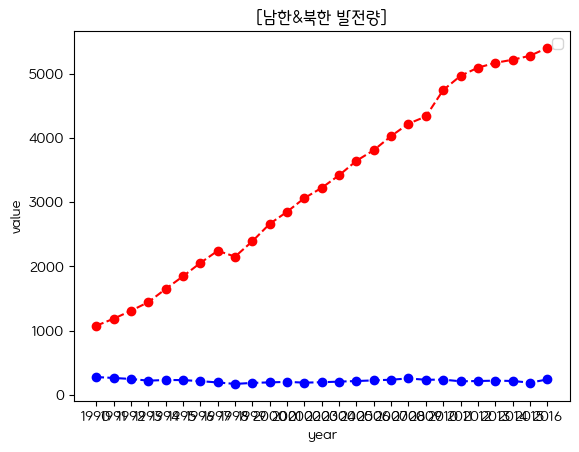

In [432]:
plt.plot(d1_index,d1_values,'ro--',d1_index,d2_values,'bo--')
plt.title("[남한&북한 발전량]")
plt.ylabel('value')
plt.xlabel('year')
plt.legend()
plt.show()